Escalado
========

Raramente nos encontramos con un conjunto de datos donde las variables compartan su rango. Una edad puede variar de 0 a cerca de 100, mientras la altura de una persona puede variar desde 1 a 2 metros. Esto puede no ser un problema, pero para algunos algoritmos de aprendizaje automatizado, lo es. Por ejemplo, la aplicación de algoritmos basados en distancias, como k-NN, o aquellos que requieran distribuciones normales con media y varianza similares, puede resultar en un mal rendimiento.

Para resolver este problema, se suele utilizar transformaciones que escalan las variables a un rango común. Las más comunes son:

- **Normalización Min-Max**: Escala las variables entre 0 y 1. Se calcula como:

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

- **Estandarización (Z-score normalization)**: Escala las variables para que tengan distribución normal, con media 0 y varianza 1. Se calcula como:

$$x_{std} = \frac{x - \mu}{\sigma}$$

Veamos como realizar estas transformaciones sobre un conjunto de datos.

## Python

En Python, podemos utilizar la clase `MinMaxScaler` del módulo `preprocessing` de la librería `scikit-learn` para realizar la normalización Min-Max. Para la estandarización, podemos utilizar la clase `StandardScaler` del mismo módulo.

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [28]:
dataset: pd.DataFrame = pd.read_csv('./datasets/clean.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dataset   572 non-null    object 
 1   id        572 non-null    int64  
 2   age       572 non-null    int64  
 3   sex       572 non-null    int64  
 4   painloc   572 non-null    float64
 5   painexer  572 non-null    float64
 6   trestbps  572 non-null    float64
 7   htn       572 non-null    float64
 8   chol      572 non-null    float64
 9   fbs       572 non-null    float64
 10  restecg   572 non-null    float64
 11  ekgmo     572 non-null    int64  
 12  ekgday    572 non-null    int64  
 13  dig       572 non-null    float64
 14  prop      572 non-null    float64
 15  nitr      572 non-null    float64
 16  pro       572 non-null    float64
 17  diuretic  572 non-null    float64
 18  thaldur   572 non-null    float64
 19  tpeakbpd  572 non-null    float64
 20  oldpeak   572 non-null    float6

In [29]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset.drop(['id', 'num', 'dataset'], axis=1))

dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.drop(['id', 'num', 'dataset'], axis=1).columns)
dataset_scaled.head()

,age,sex,painloc,painexer,trestbps,htn,chol,fbs,restecg,ekgmo,...,thaldur,tpeakbpd,oldpeak,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist
0,0.708333,1.0,1.0,1.0,0.725,1.0,0.413121,1.0,1.0,0.090909,...,0.666667,0.724771,0.524390,0.006173,0.0,0.0,0.0,0.0,0.0,0.0
1,0.791667,1.0,1.0,1.0,0.800,1.0,0.507092,0.0,1.0,0.181818,...,0.592593,0.724771,0.426829,0.006173,1.0,1.0,1.0,0.0,0.0,0.0
2,0.791667,1.0,1.0,1.0,0.600,1.0,0.406028,0.0,1.0,0.090909,...,0.518519,0.633028,0.560976,0.006173,0.0,0.0,0.0,0.0,1.0,1.0
3,0.166667,1.0,1.0,1.0,0.650,0.0,0.443262,0.0,0.0,0.090909,...,0.851852,0.522936,0.670732,0.006173,0.0,0.0,0.0,0.0,0.0,0.0
4,0.250000,0.0,1.0,1.0,0.650,1.0,0.361702,0.0,1.0,0.090909,...,0.407407,0.577982,0.414634,0.006173,0.0,0.0,0.0,0.0,0.0,0.0


Grafiquemos histogramas para verificar las escalas.

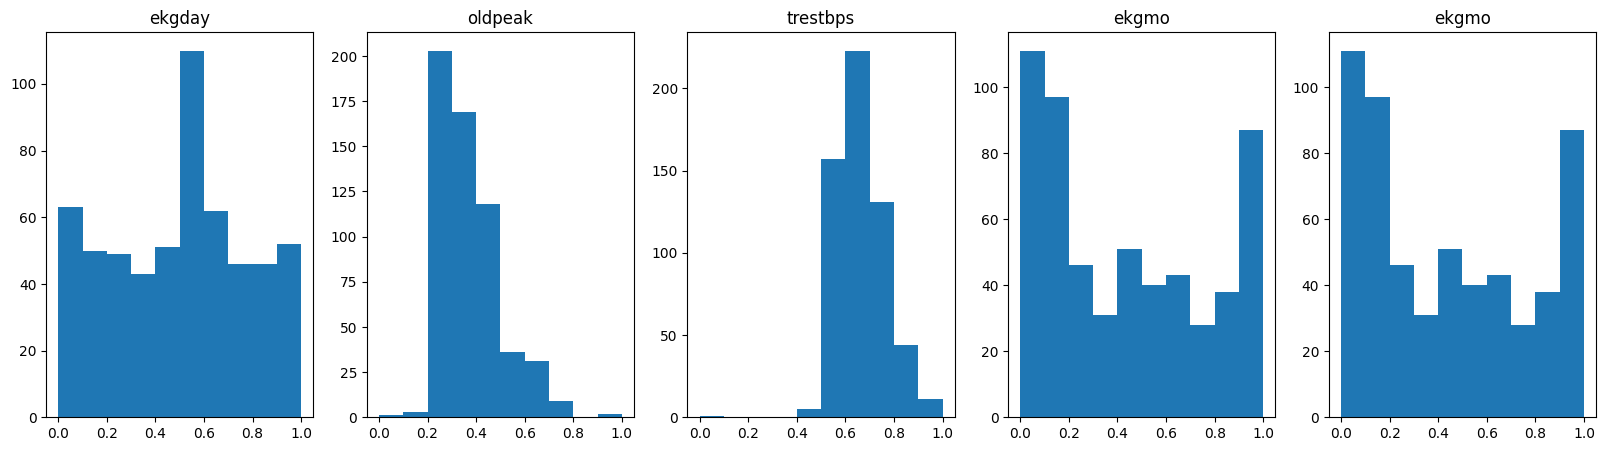

In [30]:
for col in dataset_scaled.columns:
    if len(dataset_scaled[col].unique()) <= 3:
        dataset_scaled.drop(col, axis=1, inplace=True)

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    j = np.random.randint(0, len(dataset_scaled.columns))
    axs[i].hist(dataset_scaled[dataset_scaled.columns[j]])
    axs[i].set_title(dataset_scaled.columns[j])
plt.show()

Podemos ver como todas las variables se encuentran en el rango [0, 1]. Provemos ahora con la estandarización.

In [31]:
dataset: pd.DataFrame = pd.read_csv('./datasets/clean.csv')

scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset.drop(['id', 'num', 'dataset'], axis=1))

dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.drop(['id', 'num', 'dataset'], axis=1).columns)
dataset_scaled.head()

,age,sex,painloc,painexer,trestbps,htn,chol,fbs,restecg,ekgmo,...,thaldur,tpeakbpd,oldpeak,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist
0,0.739886,0.471405,0.2,0.39736,0.669783,0.909657,0.417507,2.004381,1.368567,-1.089578,...,1.102557,0.510183,1.200519,-0.048076,-0.612372,-0.528812,-0.571967,-0.434959,-0.661200,-0.411988
1,1.188681,0.471405,0.2,0.39736,1.483742,0.909657,0.879975,-0.498907,1.368567,-0.808079,...,0.707860,0.510183,0.445150,-0.048076,1.632993,1.891031,1.748353,-0.434959,-0.661200,-0.411988
2,1.188681,0.471405,0.2,0.39736,-0.686815,0.909657,0.382604,-0.498907,1.368567,-1.089578,...,0.313162,-0.240371,1.483783,-0.048076,-0.612372,-0.528812,-0.571967,-0.434959,1.512401,2.427255
3,-2.177288,0.471405,0.2,0.39736,-0.144176,-1.099315,0.565846,-0.498907,-0.933845,-1.089578,...,2.089300,-1.141036,2.333573,-0.048076,-0.612372,-0.528812,-0.571967,-0.434959,-0.661200,-0.411988
4,-1.728492,-2.121320,0.2,0.39736,-0.144176,0.909657,0.164458,-0.498907,1.368567,-1.089578,...,-0.278883,-0.690704,0.350729,-0.048076,-0.612372,-0.528812,-0.571967,-0.434959,-0.661200,-0.411988


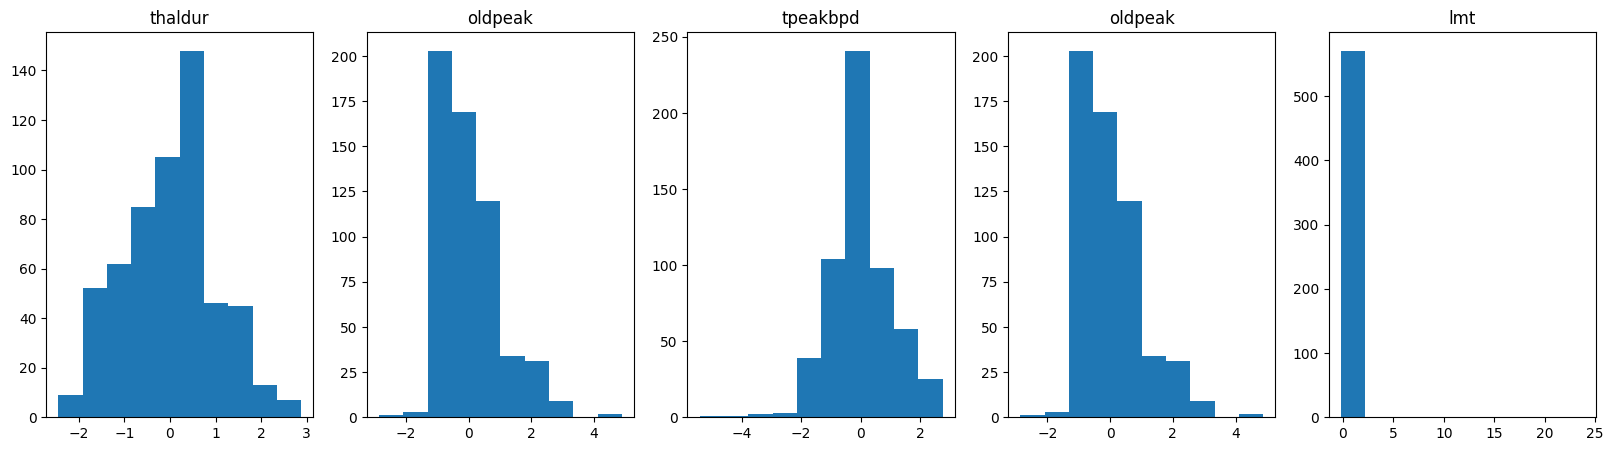

In [32]:
for col in dataset_scaled.columns:
    if len(dataset_scaled[col].unique()) <= 3:
        dataset_scaled.drop(col, axis=1, inplace=True)

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    j = np.random.randint(0, len(dataset_scaled.columns))
    axs[i].hist(dataset_scaled[dataset_scaled.columns[j]])
    axs[i].set_title(dataset_scaled.columns[j])
plt.show()

Se puede apreciar en las graficas como la estandarización llevo la distribución de las variables a una distribución normal con media 0 y varianza 1.

## RapidMiner

En RapidMiner, podemos utilizar el operador `Normalize` para realizar la normalización, tanto Min-Max como Z-score. Para ello, debemos seleccionar las variables a normalizar y el tipo de normalización a realizar.

![Normalización](../images/nrm-01.png)

El resultado se puede observar en los minimos y maximos de la pestaña de estadística.

![Normalización](../images/nrm-02.png)

Para escoger el tipo de normalización a utilizar, debemos seleccionar el tipo de normalización en el parámetro `method`.

![Normalización](../images/nrm-03.png)